 ## Objective

1. Understand the Dataset & cleanup (if required).
2. Visualize the sepals and petals to know the exact speces of Iris Flower.


## ***1. Importing package and data ***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS (1).csv


In [ ]:
# importing data in pandas
import io
dataframe = pd.read_csv(io.BytesIO(uploaded['IRIS (1).csv']))
# finding Row and Column of data
print('\nNumber of rows and columns in the data set: ',dataframe.shape)



Number of rows and columns in the data set:  (150, 5)


In [ ]:
#top 5 dataset
dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## **2. Data Understanding**

The above dataset is the data of IRIS flower with its different species, length and width of sepal and petal of the flower. With the given data of length and width of sepal and petal we are going to find the species of the IRIS Flower.<br><br>
<b>Sepal </b>: The outer parts of the flower (often green and leaf-like) that enclose a developing bud. <br><br>
<b>Petal </b>: The parts of a flower that are often conspicuously colored.
<br><br>
<i>Source : https://www.amnh.org/learn-teach/curriculum-collections/biodiversity-counts/plant-identification/plant-morphology/parts-of-a-flower#:~:text=Sepal%3A%20The%20outer%20parts%20of,slender%20filament%20supporting%20the%20anther.
</i>


 ## **3. Data Analysis**

In [ ]:
#checking the information of the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#checking the null values if present then we have to clear that particular row
dataframe.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No any null values are found. Now we will be checking the unique species in the dataset.


In [ ]:
dataframe.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Here we can see that the each species has 50 dataset which make the total dataset a total row of 150.

In [ ]:
dataframe.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

 ## **4. Data Visualization**

Firstly, checking the correlation between the columns of the dataset by plotting the heatmap.

<ipython-input-175-b99970e1917f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hp = sns.heatmap(dataframe.corr(), cmap='coolwarm')


<Axes: >

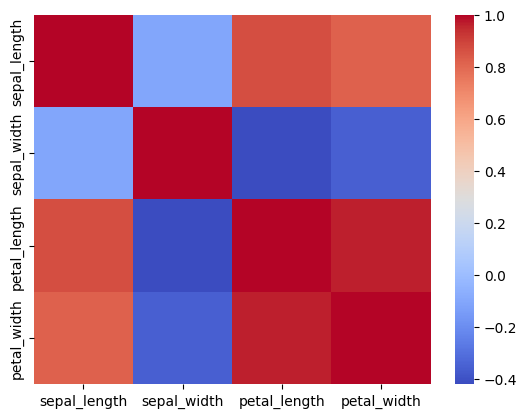

In [ ]:
hp = sns.heatmap(dataframe.corr(), cmap='coolwarm')
hp

From the above heatmap we can clearly see that petal length and petal width are closely related to each other and but the relation different goes for the sepal width and sepal length. <br>
Also, sepal length is closely related to petal length and petal width

Plotting the Histogram of every columns of the dataset

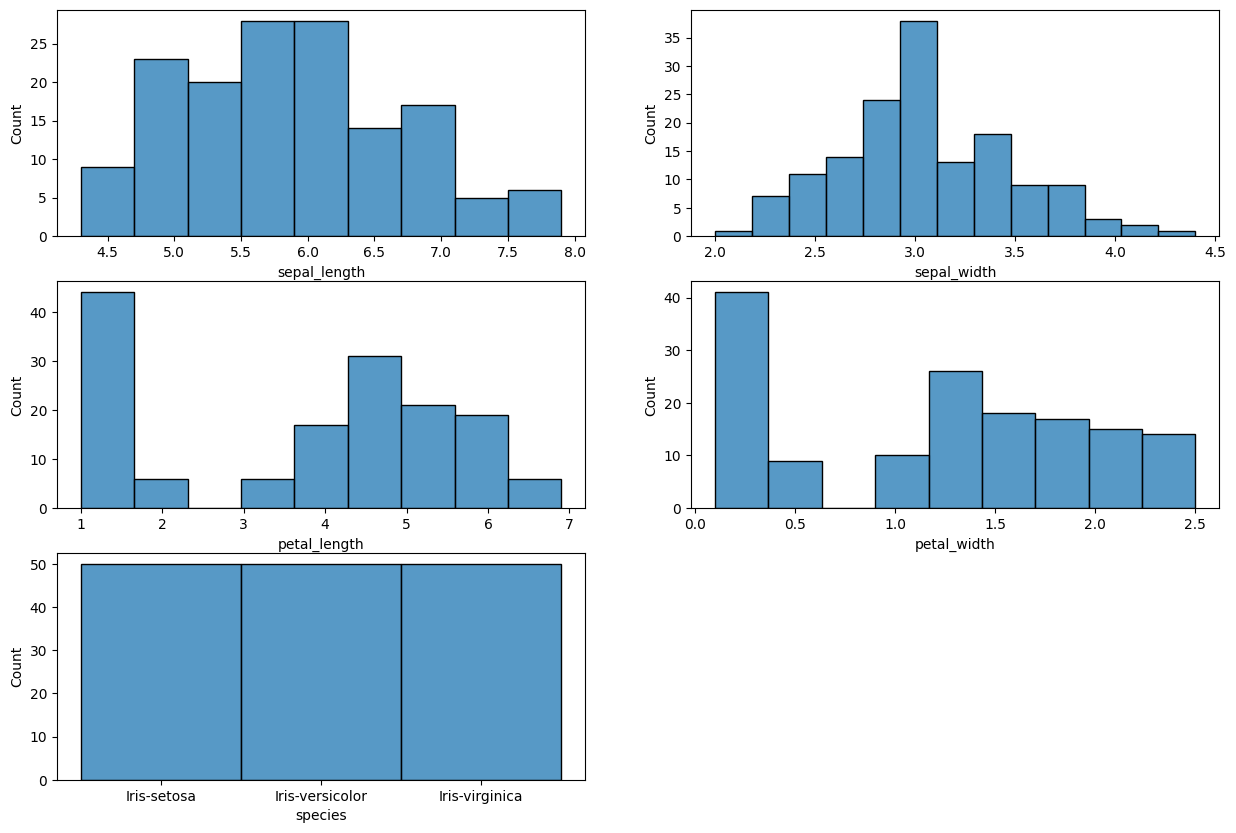

In [ ]:
n = 1
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
plt.figure(figsize=(15,10))
for i in cols:
  if n<=5:
    plt.subplot(3,2,n);
    n+= 1
    sns.histplot(x = dataframe[i])
    plt.xlabel(i)

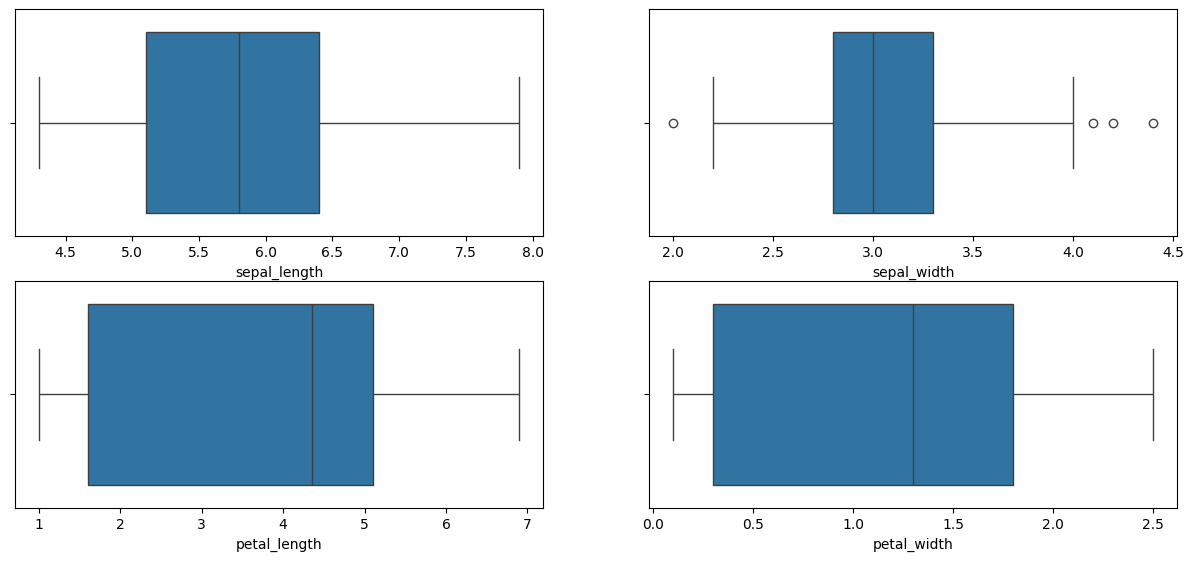

In [ ]:
#checking outliers with boxplot
n = 1
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
plt.figure(figsize=(15,10))
for i in cols:
  if n<=4:
    plt.subplot(3,2,n);
    n+= 1
    sns.boxplot(x = dataframe[i])
    plt.xlabel(i)

In [ ]:
#removing the outlier in columns
def outlier_removal(l):
    for i in cols:
        Q1  = dataframe[i].quantile(0.25)
        Q3  = dataframe[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        dataframe[i]  = np.where(dataframe[i]>Uper,Uper,(np.where(dataframe[i]<lower,lower,dataframe[i])))
outlier_removal(cols)

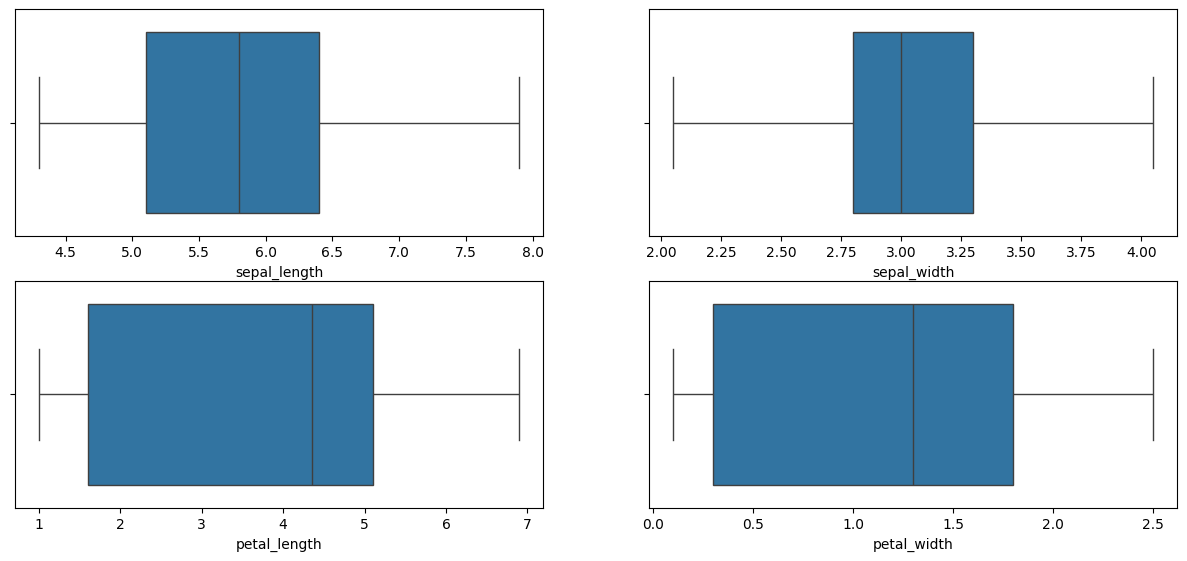

In [ ]:
n = 1
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
plt.figure(figsize=(15,10))
for i in cols:
  if n<=4:
    plt.subplot(3,2,n);
    n+= 1
    sns.boxplot(x = dataframe[i])
    plt.xlabel(i)

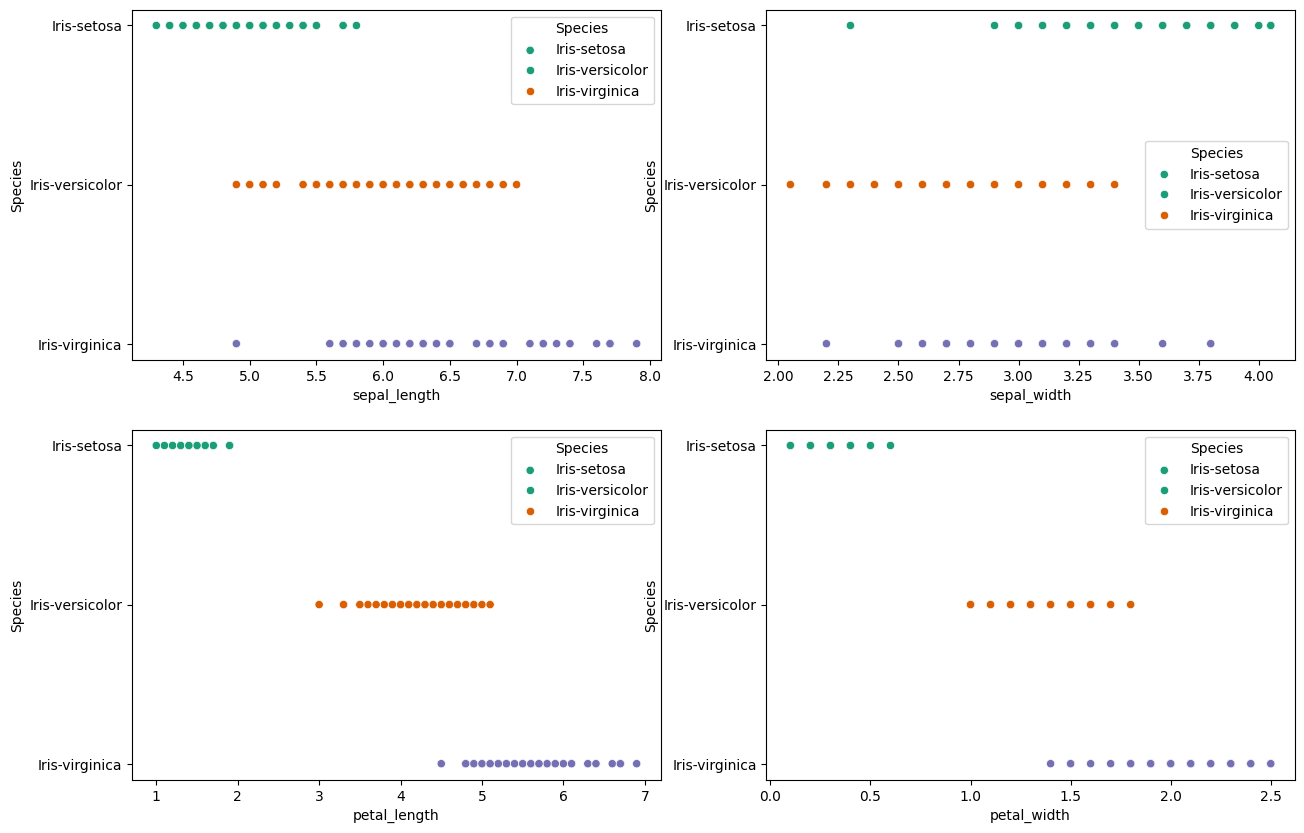

In [ ]:
n = 1
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
plt.figure(figsize=(15, 10))

for i in cols:
    if n <= 4:
        plt.subplot(2, 2, n)
        n += 1
        sns.scatterplot(x=dataframe[i], y=dataframe['species'], hue=dataframe['species'], palette='Dark2')
        plt.xlabel(i)
        plt.ylabel('Species')
        plt.legend(title='Species', labels=dataframe['species'].unique())

#plt.tight_layout()
plt.show()

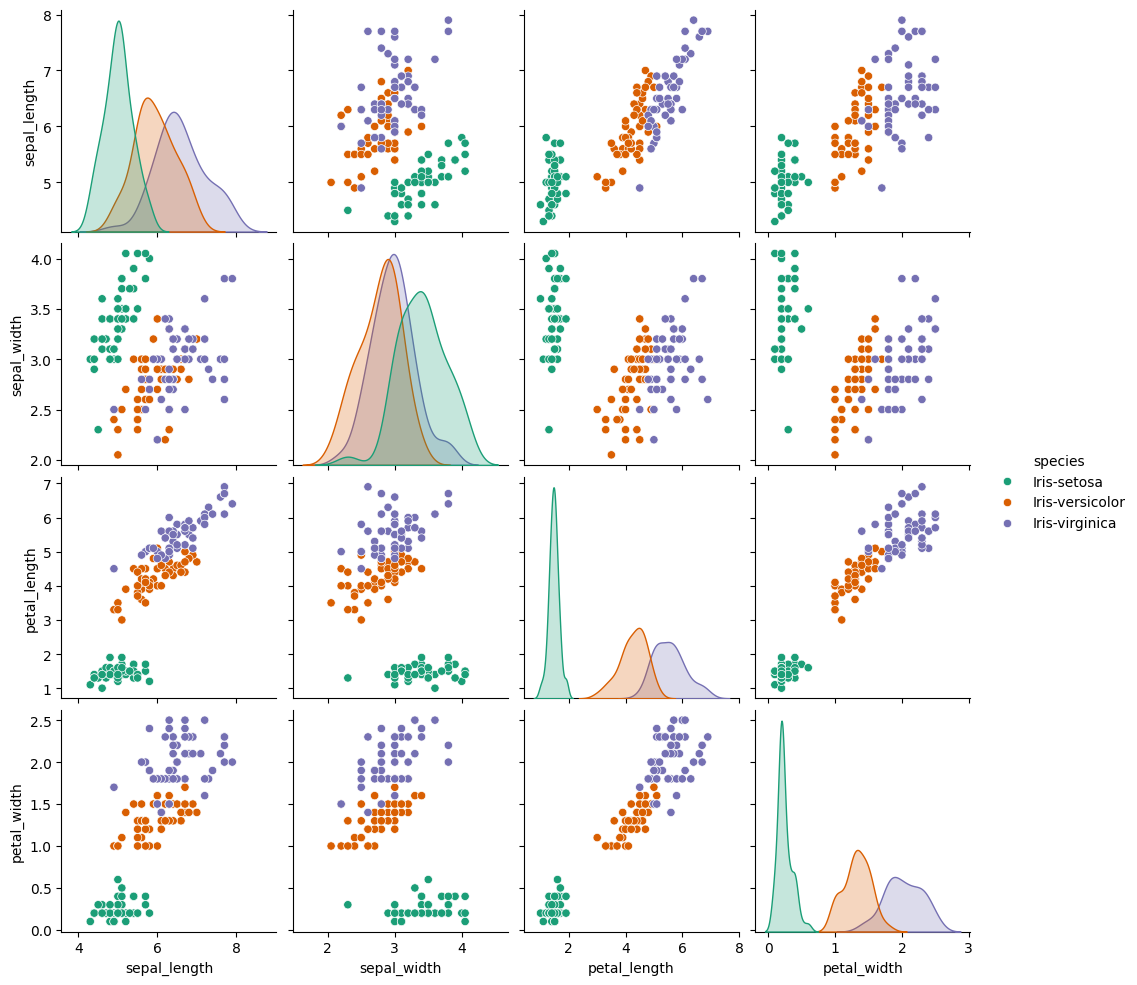

In [ ]:
sns.pairplot(dataframe,hue='species',palette='Dark2')

 ## **5. Data Pre-Processing**

As we are know the predicting the species and comparing the acutal vs the predicted species. Now we have to seperate the <b>Dependent Variable (Y) </b> and <b>Independent Variable (X) </b> from the above dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
dataframe['species_encoded'] = label_encoder.fit_transform(dataframe['species'])

In [ ]:
dataframe.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
64,5.6,2.9,3.6,1.3,Iris-versicolor,1
72,6.3,2.5,4.9,1.5,Iris-versicolor,1
56,6.3,3.3,4.7,1.6,Iris-versicolor,1
103,6.3,2.9,5.6,1.8,Iris-virginica,2
66,5.6,3.0,4.5,1.5,Iris-versicolor,1
69,5.6,2.5,3.9,1.1,Iris-versicolor,1
6,4.6,3.4,1.4,0.3,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
92,5.8,2.6,4.0,1.2,Iris-versicolor,1
124,6.7,3.3,5.7,2.1,Iris-virginica,2


In [ ]:
dataframe = dataframe.drop(["species"], axis = 1)

<Axes: >

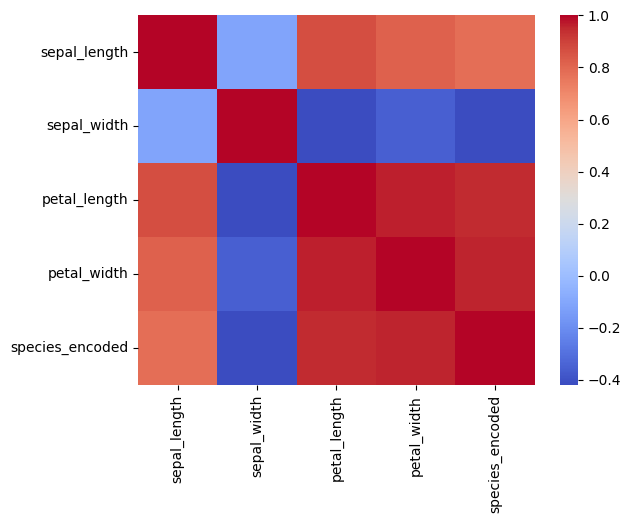

In [ ]:
#plotting new heatmap
sns.heatmap(dataframe.corr(), cmap='coolwarm')

We can clearly see that correlation between the sepals and petals are more related than it was before compared to the heaptmap shown above.


In [ ]:
X = dataframe.drop(['species_encoded'], axis=1)
Y = dataframe["species_encoded"]

In [ ]:
X.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
148,6.2,3.4,5.4,2.3
54,6.5,2.8,4.6,1.5
77,6.7,3.0,5.0,1.7
52,6.9,3.1,4.9,1.5
64,5.6,2.9,3.6,1.3


In [ ]:
Y.sample(5)

27     0
40     0
147    2
4      0
78     1
Name: species_encoded, dtype: int64

Using Train Test Split to seperate the Training and Testing values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state= 32)

 ## **6. Machine Learning Algorithm Implementation**

<b>Function to implement Machine Learning Models


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def algorithm(model,model_name):
    model = model.fit(X_train,y_train)
    predict = model.predict(X_test)
    return {"Model_name":model_name,"Model Score":model.score(X_train,y_train),
            "MSE": mean_squared_error(y_test,predict),
            "MAE":mean_absolute_error(y_test,predict),
            "R Square": r2_score(y_test,predict),
           },model


<b>Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()

In [ ]:
lreg_model,model = algorithm(l_reg,"Linear Regression")

In [ ]:
lreg_model

{'Model_name': 'Linear Regression',
 'Model Score': 0.9305748567403431,
 'MSE': 0.049942101319415386,
 'MAE': 0.1762349888892353,
 'R Square': 0.92762014301534}

<b> Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfs = RandomForestRegressor()

In [ ]:
rfs_model,model = algorithm(rfs,"Random Forest Regressor")

In [ ]:
rfs_model

{'Model_name': 'Random Forest Regressor',
 'Model Score': 0.9910864745011086,
 'MSE': 0.009236666666666669,
 'MAE': 0.03233333333333334,
 'R Square': 0.9866135265700483}

<b> Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [ ]:
dtr_model,model = algorithm(dtr,"Decision Tree Regressor")

In [ ]:
dtr_model

{'Model_name': 'Decision Tree Regressor',
 'Model Score': 1.0,
 'MSE': 0.03333333333333333,
 'MAE': 0.03333333333333333,
 'R Square': 0.9516908212560387}

<b>K-Nearest Neighbour Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn =KNeighborsRegressor()

In [ ]:
knn_model,model = algorithm(knn,"K-Nearest Neighbour Regressor")

In [ ]:
knn_model

{'Model_name': 'K-Nearest Neighbour Regressor',
 'Model Score': 0.9589483687044663,
 'MSE': 0.010666666666666661,
 'MAE': 0.039999999999999994,
 'R Square': 0.9845410628019323}

<b> xgBoost Regressor

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [ ]:
xgb_model, model = algorithm(xgb, "XGB Regressor")

In [ ]:
xgb_model

{'Model_name': 'XGB Regressor',
 'Model Score': 0.9999986564010982,
 'MSE': 0.008704802980070984,
 'MAE': 0.030973699656897224,
 'R Square': 0.9873843435071435}

<b> Validation of Model

In [ ]:
data  = [lreg_model,rfs_model,dtr_model,knn_model,xgb_model]

In [ ]:
model_validation = pd.DataFrame(data)

In [ ]:
model_validation

,Model_name,Model Score,MSE,MAE,R Square
0,Linear Regression,0.930575,0.049942,0.176235,0.927620
1,Random Forest Regressor,0.991086,0.009237,0.032333,0.986614
2,Decision Tree Regressor,1.000000,0.033333,0.033333,0.951691
3,K-Nearest Neighbour Regressor,0.958948,0.010667,0.040000,0.984541
4,XGB Regressor,0.999999,0.008705,0.030974,0.987384


Here have Achieved the Model Score of 100% in Decision Tree Regressor which is due to the size of the dataset. So for this reason I am not considering the model accuracy of Decision Tree. <br><br>
From the above table we can clearly see that Mean square error and Mean Average error of the XGB Regressor is minimum than other and has the Model Score of <b>99%.  <br>